# Group 10 - Homework 8 -[Naive Bayes]
## Group Members:
1.Mahajabin Mostafa   
2.Navya Madhuri Bagireddy  
3.Akshay Manoj  
4.Vinaika Maruvada

## Part I: Explain Laplace smoothing

Naïve Bayes classifier is a supervised machine learning technique. It is utilized for classification tasks like text classification. To carry out classification jobs, they apply probability concepts.

Under two fundamental presumptions, naïve Bayes classifiers function. Within a Naïve Bayes model, it is assumed that predictors are independent of all other features, or conditionally independent. Furthermore, it presumes that every feature influences the result in the same way. 

For instance, we want to categorize emails using this training data and assign a spam or ham label to each one. We'll discover a relationship of some kind that will allow us to forecast previously unseen emails. We can use naive bayes classifier for this. The Naive Bayes classifier may overfit if the training dataset is too small. If the dataset is small, the model may learn noise instead of broad trends. When text categorization involves sparse or uncommon feature combinations, the Naive Bayes model may overfit to the training set by giving these uncommon combinations too high probabilities.

By using Laplace smoothing, overfitting in Naive Bayes classifiers can be reduced. By avoiding zero probabilities for unobserved characteristics in the test data, Laplace smoothing can improve the model's ability to generalize. The idea behind Laplace smoothing with strength k is to presume that we have seen k more examples of each result. Therefore, if  maximum likelihood estimate for an outcome x for a given sample is such that it can take on |X| distinct values from a sample of size N, then-

$$ \text{P}_{\text{MLE}}(x) = \frac{\text{count}(x)}{N} $$

Now, using strength k, the Laplace estimate is-


$$ \text{P}_{\text{LAP},k}(x) = \frac{\text{count}(x) + k}{N + k |X|} $$

We've assumed that we'll witness k more instances of each outcome;as though we've seen count(x)+k instead of count(x) instances of x. Similarly, we have to add k|X| to our initial number of samples N if we find k extra instances of each of the |X| classes. The formula above is produced when these two assertions are combined. Calculating Laplace estimates for conditionals yields a similar result and is helpful for estimating outcomes for various classes:

$$ \text{P}_{\text{LAP},k}(x \mid y) = \frac{\text{count}(x, y) + k}{\text{count}(y) + k \times |X|} $$

For Laplace smoothing, there are two particularly noteworthy situations. One when k= 0 then $ \text{P}_{\text{LAP},0}(x) = \text{P}_{\text{MLE}}(x) $. Another case is when k = ∞, which means each of the outcomes implied by Laplace estimates is equally likely. These are the cases where we observe extreme values of k.  

Generally, trial and error is used to find the precise value of k that should be used in the model. Here, k is a hyperparameter.




## Part II: Build a Naive Bayes algorithm on the titanic data set  to predict whether a passenger survived or not.

## Aim

To build a Naive Bayes classifier to predict passenger survival or death based on attributes from the Titanic dataset.

## About the Dataset

The titanic dataset provides insight about some passengers who were present on that ship. Columns of this datasets are-

1. **PassengerId:**  A unique identifier assigned to each passenger.
2. **Survived:**  Indicates whether a passenger survived (1) or did not survive (0) the disaster.
3. **Pclass:** Represents the passenger class (ticket class) which indicates the socio-economic status:
1 = Upper class
2 = Middle class
3 = Lower class
4. **Name:** The full name of the passenger.
5. **Sex:**  Gender of the passenger (male or female).
6. **Age:**  Age of the passenger in years. This includes infants, children, adults, and elderly individuals.
7. **SibSp:** Number of siblings or spouses aboard the Titanic for each passenger.
8. **Parch:** Number of parents or children aboard the Titanic for each passenger.
9. **Ticket:** Ticket number assigned to each passenger.
10. **Fare:** The amount of money paid for the ticket.
11. **Cabin:** Cabin number where the passenger stayed (if known).
12. **Embarked:** Port of embarkation where the passenger boarded the Titanic:
C = Cherbourg (France)
Q = Queenstown (Ireland)
S = Southampton (England)


## Methodology

#### Importing necessary libraries and dataset

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [204]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [207]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are a lot of null values in Cabin column, so we are going to drop it. Also, passengerId, Ticket and Name are not appropriate columns to be used in the analysis, so we are going to drop them as well.

In [208]:
columns_to_drop = ['PassengerId','Name','Cabin','Ticket']
df.drop(columns=columns_to_drop, inplace=True)

In [209]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Since, the column Age and Embarked have missing values lets use imputing techniques to full them.

In [210]:
#Filling missing values of Age with mean
df.fillna(df.mean(numeric_only=True),inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [211]:
#Filling missing values of Embarked with mode as its a categorical variable
mode_em = df['Embarked'].mode().iloc[0]
df['Embarked'].fillna(mode_em, inplace=True)

In [212]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

So, now we donot have any missing values in our dataset. We can proceed with our exploratory data anlaysis to find out underlying patterns in our data.

### Exploratory Data Analysis

**Bar plot to know the count of classes in the target variable**

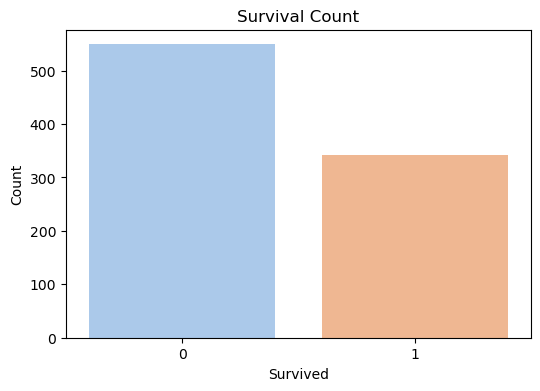

In [213]:
#output variable
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 4))  
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='pastel')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

In [214]:
survived_counts

0    549
1    342
Name: Survived, dtype: int64

There are 549 passengers who didnot survive and 342 passengers who survived from the incident

In [215]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Stacked Barchart**

<Axes: xlabel='Sex'>

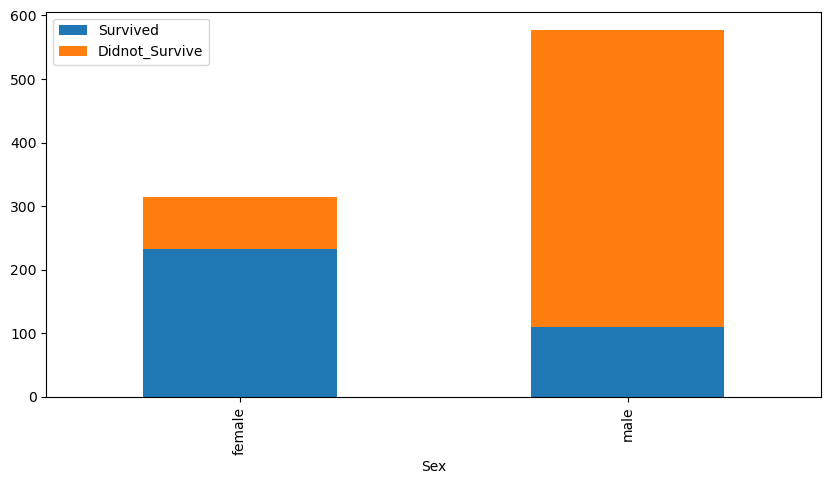

In [216]:
#Visualizing survivals based on gender
df['Didnot_Survive'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Didnot_Survive']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)


There are 577 males and 314 female passengers in total.

**Histogram for numerical variables**

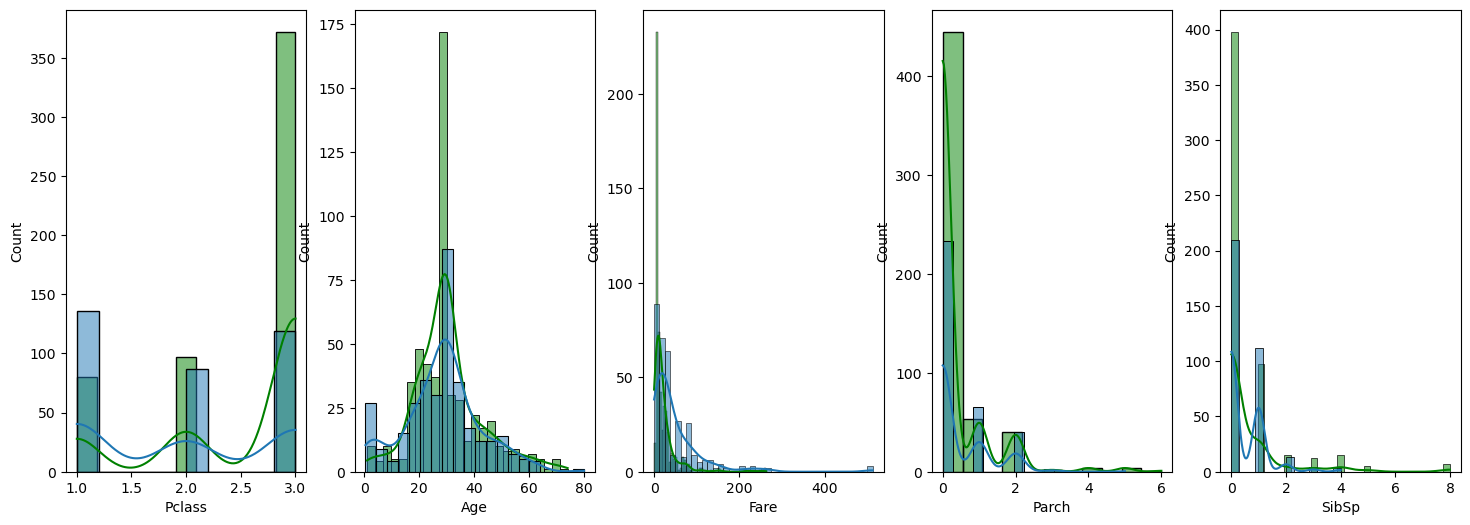

In [217]:
import seaborn as sns
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

sns.histplot(df[df.Survived==0], ax=axes[0], x="Pclass", kde=True, color="g")
sns.histplot(df[df.Survived==1], ax=axes[0], x="Pclass", kde=True)

sns.histplot(df[df.Survived==0], ax=axes[1], x="Age", kde=True, color="g")
sns.histplot(df[df.Survived==1], ax=axes[1], x="Age", kde=True);

sns.histplot(df[df.Survived==0], ax=axes[2], x="Fare", kde=True, color="g")
sns.histplot(df[df.Survived==1], ax=axes[2], x="Fare", kde=True);

sns.histplot(df[df.Survived==0], ax=axes[3], x="Parch", kde=True, color="g")
sns.histplot(df[df.Survived==1], ax=axes[3], x="Parch", kde=True);

sns.histplot(df[df.Survived==0], ax=axes[4], x="SibSp", kde=True, color="g")
sns.histplot(df[df.Survived==1], ax=axes[4], x="SibSp", kde=True);

In [218]:
columns_to_drop = ['Didnot_Survive']
df.drop(columns=columns_to_drop, inplace=True)

**Box Plot**

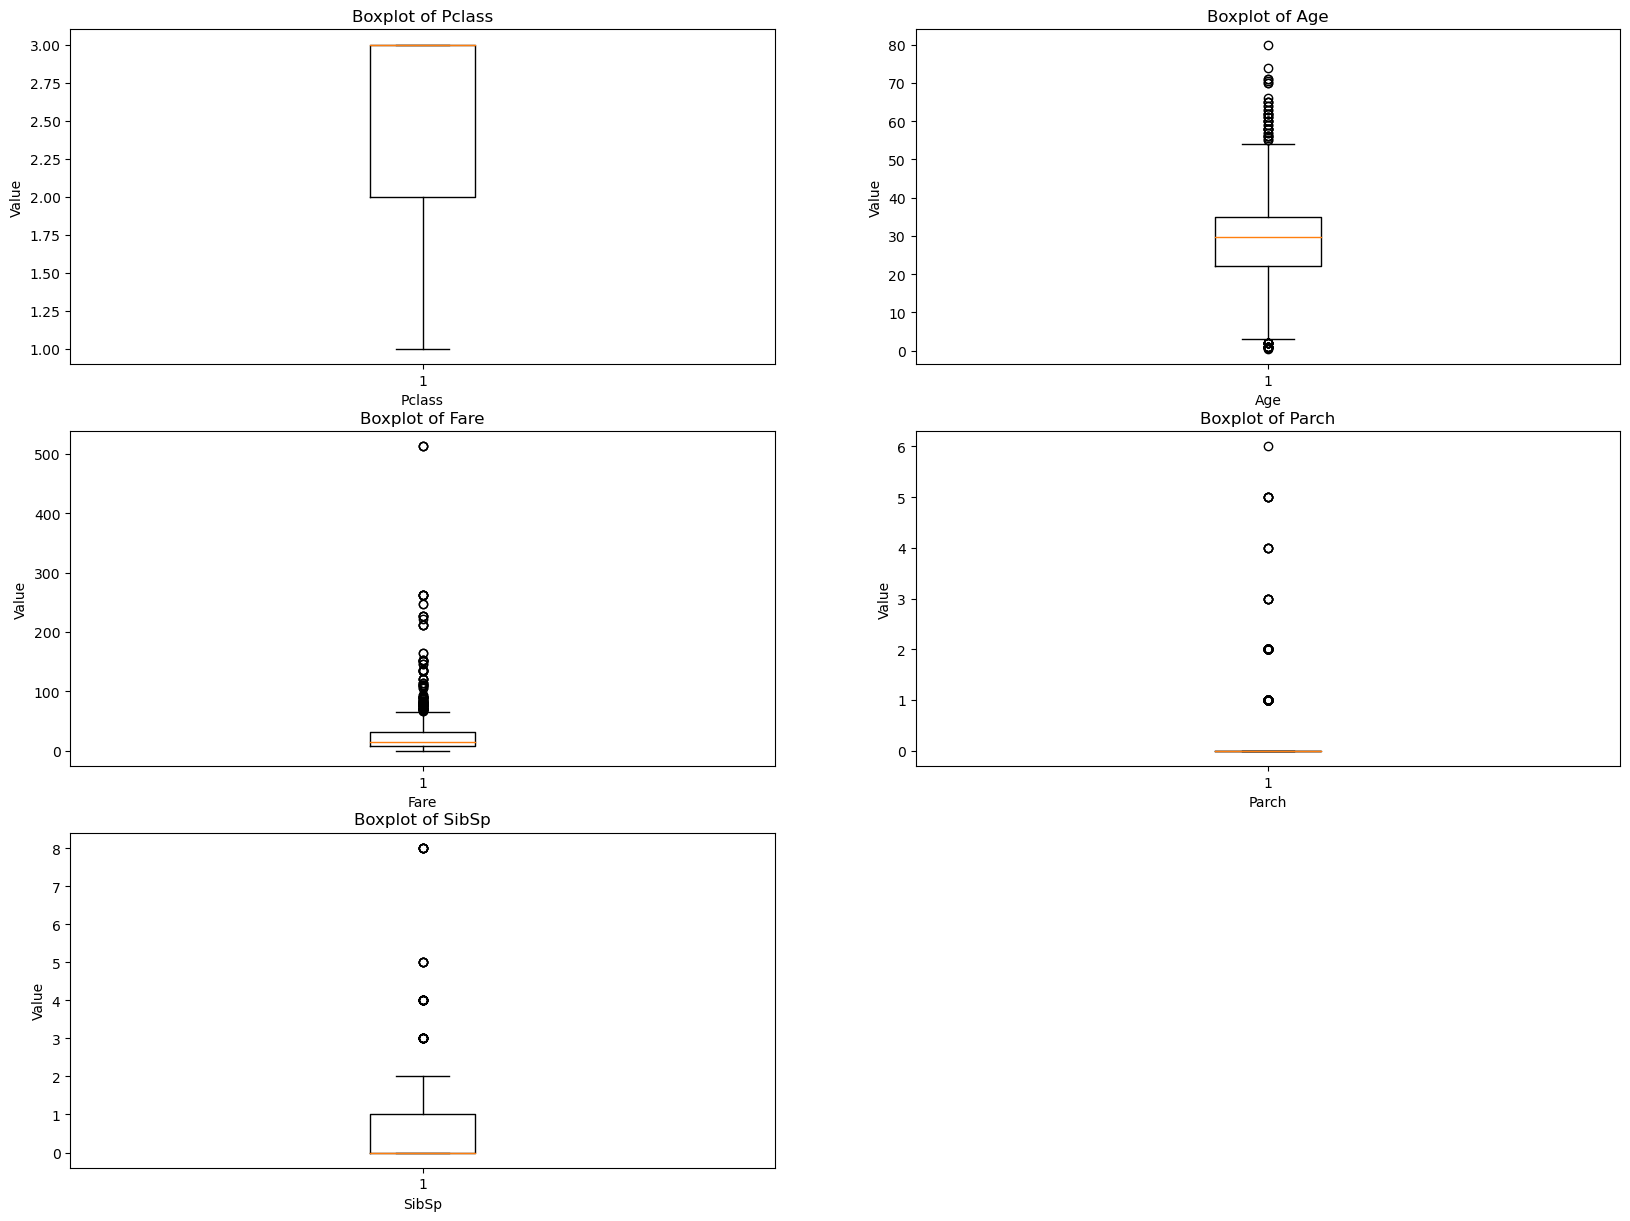

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.tight_layout(pad=3.0)

plt.subplot(4, 2, 1)
plt.boxplot(df['Pclass'])
plt.title('Boxplot of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Value')

plt.subplot(4, 2, 2)
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Value')

plt.subplot(4, 2, 3)
plt.boxplot(df['Fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.ylabel('Value')

plt.subplot(4, 2, 4)
plt.boxplot(df['Parch'])
plt.title('Boxplot of Parch')
plt.xlabel('Parch')
plt.ylabel('Value')

plt.subplot(4, 2, 5)
plt.boxplot(df['SibSp'])
plt.title('Boxplot of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Value')



plt.show()


We can have these outliers in the data as the Age of passengers can vary. Also with more family memebrs and childern the Fare can increase. So we arenot removing any outliers from this data.

**Correlation Matrix and Heat Map**

In [220]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


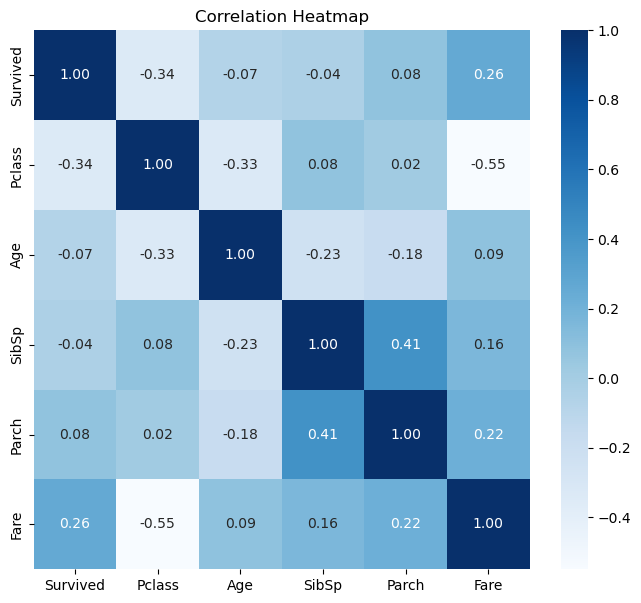

In [221]:
plt.figure(figsize=(8, 7))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Pair Plot**

<Figure size 640x480 with 0 Axes>

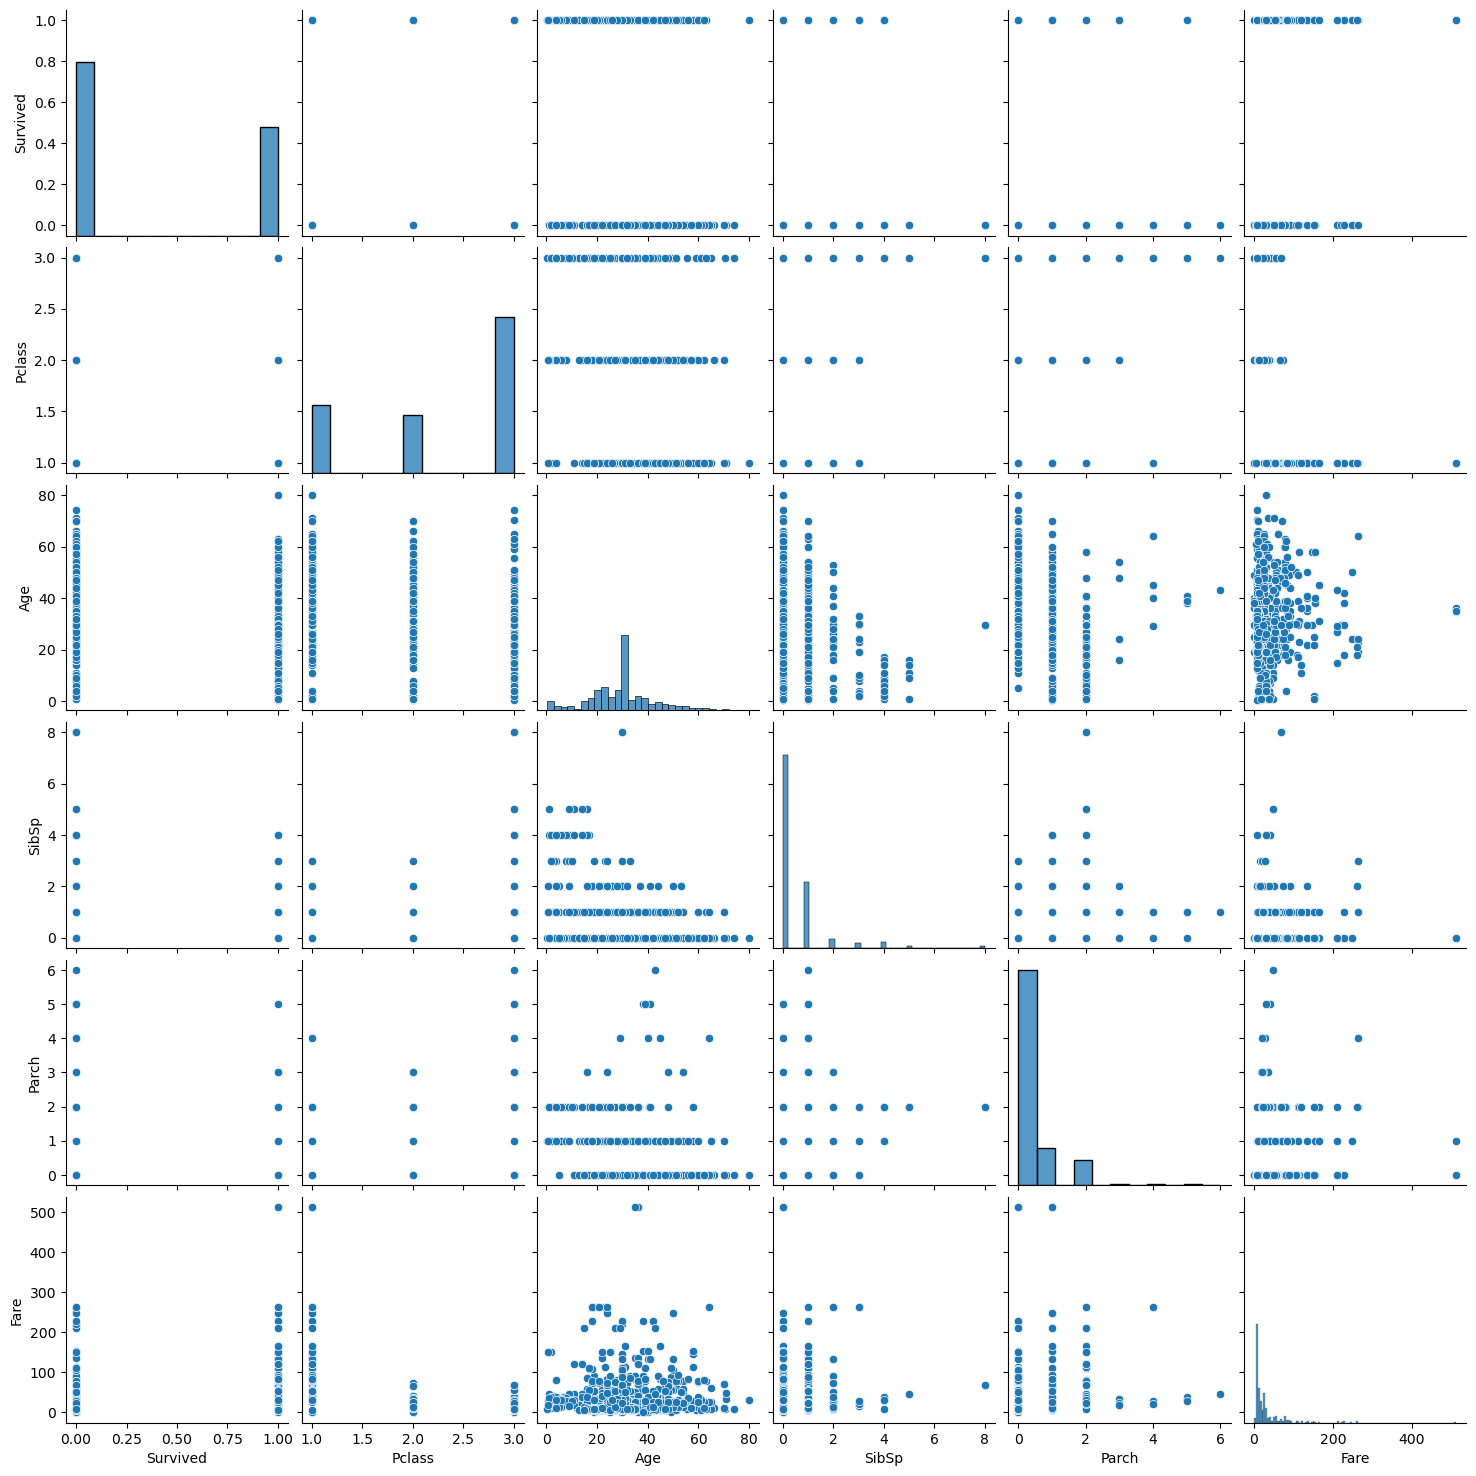

In [222]:
#pair plot
plt.figure(dpi=100)
sns.pairplot(df)

From the pair plot we see that Fare is dependent on the columns SibSp and Parch. So, to satisfy the assumption of independence for Naive Bayes, we will drop the column 'Fare' and continue our analysis.

In [223]:
columns_to_drop = ['Fare']
df.drop(columns=columns_to_drop, inplace=True)

**Encoding Categorical variables to Numerical**

In [224]:
#Converting categorical values to numerical 
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,S
1,1,1,0,38.000000,1,0,C
2,1,3,0,26.000000,0,0,S
3,1,1,0,35.000000,1,0,S
4,0,3,1,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,S
887,1,1,0,19.000000,0,0,S
888,0,3,0,29.699118,1,2,S
889,1,1,1,26.000000,0,0,C


In [225]:
df_encoded=pd.get_dummies(df,columns=['Embarked'])

In [226]:
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,0,0,1
1,1,1,0,38.000000,1,0,1,0,0
2,1,3,0,26.000000,0,0,0,0,1
3,1,1,0,35.000000,1,0,0,0,1
4,0,3,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,0,0,1
887,1,1,0,19.000000,0,0,0,0,1
888,0,3,0,29.699118,1,2,0,0,1
889,1,1,1,26.000000,0,0,1,0,0


Clearly, all our values are discrete except for the Age column. So, lets discretize our Age column and fit the MultinomialNB() model.

In [227]:
# Since, min-value of age is 0.4 and max is 80, lets design the bins accordingly
bins = [0, 20, 40, 60, 80]

# Define labels for bins
labels = ['0-20', '21-40', '41-60', '61-80']

# Discretize 'Age' column using bins and labels
df_encoded['Age_Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Age_Group' column
df_encoded['Age_Group_Encoded'] = label_encoder.fit_transform(df_encoded['Age_Group'])

df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Age_Group,Age_Group_Encoded
0,0,3,1,22.000000,1,0,0,0,1,21-40,1
1,1,1,0,38.000000,1,0,1,0,0,21-40,1
2,1,3,0,26.000000,0,0,0,0,1,21-40,1
3,1,1,0,35.000000,1,0,0,0,1,21-40,1
4,0,3,1,35.000000,0,0,0,0,1,21-40,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,0,0,1,21-40,1
887,1,1,0,19.000000,0,0,0,0,1,0-20,0
888,0,3,0,29.699118,1,2,0,0,1,21-40,1
889,1,1,1,26.000000,0,0,1,0,0,21-40,1


In [228]:
#lets just keep the Age_Group_Encoded column for further analysis
columns_to_drop = ['Age','Age_Group']
df_encoded.drop(columns=columns_to_drop, inplace=True)

In [270]:
df_encoded

,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Age_Group_Encoded
0,0,3,1,1,0,0,0,1,1
1,1,1,0,1,0,1,0,0,1
2,1,3,0,0,0,0,0,1,1
3,1,1,0,1,0,0,0,1,1
4,0,3,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,0,1,1
887,1,1,0,0,0,0,0,1,0
888,0,3,0,1,2,0,0,1,1
889,1,1,1,0,0,1,0,0,1


### Model Building

In [271]:
X = df_encoded[['Pclass', 'Sex', 'Age_Group_Encoded', 'SibSp',
       'Parch', 'Embarked_C','Embarked_Q','Embarked_S']]
y = df_encoded['Survived']

In [272]:
#splitting the data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [273]:
#Develop a Multinomial Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
#Fit the model
model.fit(X_train, y_train)

MultinomialNB()

In [274]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [275]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

### Model Evaluation Metrics

In [276]:
#Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6759776536312849

In [277]:
#Calculate Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       137
           1       0.39      0.69      0.50        42

    accuracy                           0.68       179
   macro avg       0.63      0.68      0.63       179
weighted avg       0.76      0.68      0.70       179



<Axes: >

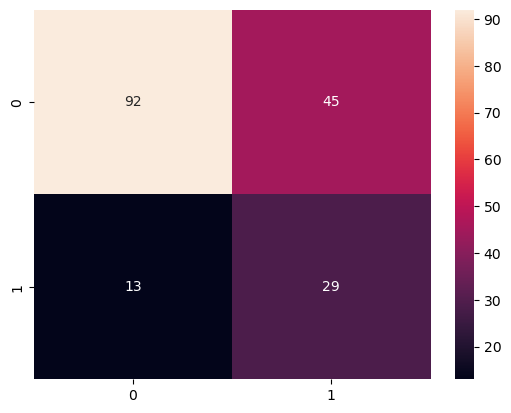

In [278]:
#Confusion Matrix
cma = confusion_matrix(y_pred,y_test)
sns.heatmap(cma,annot=True)

1) Precision:
* Precision for class 0 (died): 0.88
This means that among all instances predicted as "died", 88% were actually "died".
* Precision for class 1 (survived): 0.39
This means that among all instances predicted as "survived", 39% were actually "survived".

2) Recall:
* Recall for class 0 (died): 0.67
This means that among all actual instances of "died", 67% were correctly predicted as "died".
* Recall for class 1 (survived): 0.69
This means that among all actual instances of "survived", 69% were correctly predicted as "survived".

3) F1-score:
* F1-score for class 0 (died): 0.76
The harmonic mean of precision and recall for class 0. It provides a balance between precision and recall.
* F1-score for class 1 (survived): 0.50
The harmonic mean of precision and recall for class 1.

4) Accuracy:
* Overall accuracy of the model on the test set: 68%
Percentage of correctly predicted instances out of all instances.

**Taking some values for the explanatory variables and using the model to predict if tht person would have survived or not.**

In [279]:
#Example 1:
new_passenger_data = pd.DataFrame({'Pclass': [3], 'Sex': [1], 'Age_Group_Encoded': [1], 'SibSp': [0], 'Parch': [0], 'Embarked_C': [0],'Embarked_Q': [1],'Embarked_S': [0]})
predicted_survival = model.predict(new_passenger_data)
print(f"Predicted Survival: {predicted_survival}")

Predicted Survival: [0]


For the above given input, the model predicted that the passenger wouldnt survive.

In [280]:
#Example 2:
new_passenger_data = pd.DataFrame({'Pclass': [1], 'Sex': [0], 'Age_Group_Encoded': [3], 'SibSp': [0], 'Parch': [2],'Embarked_C': [1],'Embarked_Q': [0],'Embarked_S': [0]})
predicted_survival = model.predict(new_passenger_data)
print(f"Predicted Survival: {predicted_survival}")

Predicted Survival: [1]


For the above given input, the model predicted that the passenger would survive.

## Conclusion 

* Naive Bayes model is a supervised machine learning technique that is used for classification using probability concepts. 
* Since, we have discrete values in our dataset we used MultinomialNB(), to build the model.
* The model has a higher precision for class 0 (died) compared to class 1 (survived), indicating it's better at predicting deaths.
* Recall is higher for class 1 (survived), indicating the model is better at identifying instances of survival.
* F1-score for class 1 is lower, indicating a compromise between precision and recall for the survival class.
* The overall accuracy of the model is 68%, meaning it correctly predicts the survival status for 68% of instances.
